# Logistic Regression

***

* Formulation

***

Logistic regression (also called **log**istic un**it**, logit) is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. The logistic function is a monotonous and defferentiable function used to connect the true label $y$ and predicted value $f(\mathbf{x})$. The most popular logistic function is the so-called sigmoid function $\displaystyle \sigma(\mathbf{z}) = \frac{1}{1+e^{-\mathbf{z}}}$. Then the logistic regression assume

\begin{equation}
\displaystyle y = \frac{1}{1+e^{-f(\mathbf{x})}} = \frac{1}{1+e^{-(\mathbf{w}^T\mathbf{x} + b)}}   \tag{1}
\end{equation}

This can be rewritten as

\begin{equation}
\displaystyle ln \left(\frac{y}{1-y} \right) = \mathbf{w}^T\mathbf{x} + b   \tag{2}
\end{equation}

This means, in Logistic regression, the linear regression results $\mathbf{w}^T\mathbf{x} + b$ is used to approach the log-odds of true label $\displaystyle ln \left(\frac{y}{1-y} \right)$.

* Algorithm

Given features $\mathbf{x}$ and label $y$, how to determine $\mathbf{w}$ and $b$?

We may use the similar cost function as linear regression method $E_{(w, b)} = \sum\limits_{i=1}^m (y_i - f(x_i))^2$. However, note that we use the sigmoid function in logistic regression, at this time, the cost function $E_{(w, b)}$ is not a convex function. That means the results may not easily converge to an optimal point if gradient descent is applied.

An alternative way is to use the maximum likelihood method. Let's view $y$ as the probability of positive cases, and $1-y$ as the probability of positive cases. 

\begin{equation}
\displaystyle y = p(y=1 \vert \mathbf{x} ) = p_1 = \frac{e^{\mathbf{w}^T\mathbf{x} + b}}{1 + e^{\mathbf{w}^T\mathbf{x} + b}}   \tag{3}
\end{equation}

\begin{equation}
\displaystyle 1-y = p(y=0 \vert \mathbf{x} ) = p_0 = \frac{1}{1 + e^{\mathbf{w}^T\mathbf{x} + b}}   \tag{4}
\end{equation}

Set $\mathbf{w}^T\mathbf{x} + b = \beta^T \hat{\mathbf{x}}$, where $\beta = (\mathbf{w}, b)$, and $\hat{\mathbf{x}} = (\mathbf{x}; 1)$. Based on Bernoulli Distribution, the likelihood of the logistic regression 

\begin{equation}
\displaystyle L(\beta) = \prod_{i=1}^{m} p(y=y_i \vert \mathbf{x}_i; \mathbf{w}, b) = \prod_{i=1}^{m} p_1^{y_i}  +  p_0^{(1-y_i)} \tag{5}
\end{equation}

For easier calculations, the likelihood is updated to the log-likelihood

\begin{equation}
\displaystyle LL(\beta) = \prod_{i=1}^{m} ln p(y=y_i \vert \mathbf{x}_i; \mathbf{w}, b) = \prod_{i=1}^{m}  y_i ln p_1  + (1-y_i) ln p_0 \tag{6}
\end{equation}

The corrsponding cross-entropy or cost function is the invert of log-likelihood

\begin{equation}
\displaystyle J(\beta) = \prod_{i=1}^{m}  - y_i ln p_1  - (1-y_i) ln p_0 \tag{7}
\end{equation}

The optimal solution is then

\begin{equation}
\displaystyle \beta^* = \underset{\mathbf{\beta}}{\arg\min} J(\beta) \tag{8}
\end{equation}

* Hand-on examples

Accuracy:  97.75 %


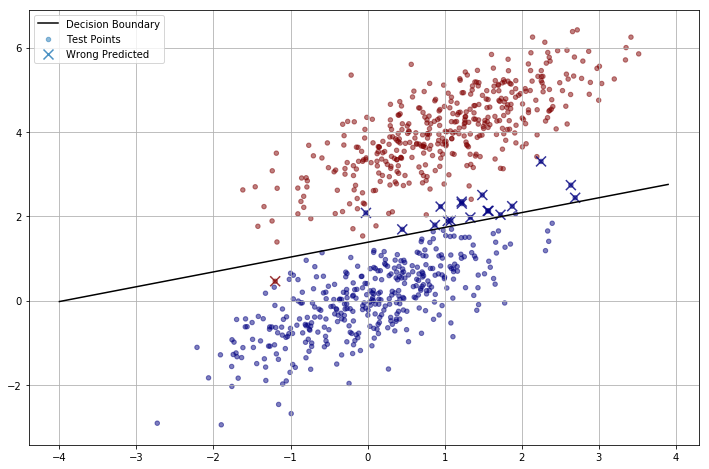

In [111]:
import numpy as np 
import pandas as pd 
import math as m
import matplotlib.pyplot as plt 

def train_test_split(X, Y, train_size, shuffle):
    ''' Perform tran/test datasets splitting '''
    if shuffle:
        randomize = np.arange(len(X))
        np.random.shuffle(randomize)
        X = X[randomize]
        Y = Y[randomize]
    s_id = int(len(Y) * train_size)
    X_train, X_test = X[:s_id], X[s_id:]
    Y_train, Y_test = Y[:s_id], Y[s_id:]

    return X_train, X_test, Y_train, Y_test    


def train_test_split_po(X, Y, train_size, shuffle):
    ''' Perform tran/test datasets splitting '''
    if shuffle:
        randomize = np.arange(len(X))
        np.random.shuffle(randomize)
        X = X[randomize]
        Y = Y[randomize]
    s_id = int(len(Y) * train_size)
    X_train, X_test = X[:s_id], X[s_id:]
    Y_train, Y_test = Y[:s_id], Y[s_id:]
    Y_train = Y_train.reshape((-1, 1))
    X_train1 = np.append(X_train, Y_train, axis = 1) 
    X_train1 = X_train1[np.argsort(X_train1[:, 0])]
    Y_test = Y_test.reshape((-1, 1))
    X_test1 = np.append(X_test, Y_test, axis = 1) 
    X_test1 = X_test1[np.argsort(X_test1[:, 0])]
    X_train, X_test = X_train1[:,:-1], X_test1[:,:-1]
    Y_train, Y_test = X_train1[:,-1], X_test1[:,-1]
    Y_train=np.squeeze(Y_train)
    Y_test=np.squeeze(Y_test)
    return X_train, X_test, Y_train, Y_test 


def metric_mse(Y_label, Y_pred):
    ''' Evaluate mean squared error (MSE) '''
    return np.mean(np.power(Y_label - Y_pred, 2))

def metric_rmse(Y_label, Y_pred):
    ''' Evaluate root mean squared error (RMSE) '''
    return m.sqrt(np.mean(np.power(Y_label - Y_pred, 2)))

def metric_accuracy(Y_label, Y_pred):
    '''Evaluate the accuracy'''
    correct_amount = 0 
    for i in range(np.size(Y_pred)) :   #np.size: Number of elements in the array
        if Y_label[i] == Y_pred[i] :             
            correct_amount = correct_amount + 1
    return correct_amount / np.size(Y_pred) * 100

def readin_csv_data(path):
    df = pd.read_csv(path) 
    X = df.iloc[:,:-1].values 
    Y = df.iloc[:,-1].values 
    return X, Y

def generate_dataset_MVND():
    '''generate a dataset that satisfies the multivariate normal distribution'''
    np.random.seed(24) # Fixing random state for reproducibility
    num_observations = 2000
    x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
    x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)
    X = np.vstack((x1, x2)).astype(np.float32)
    Y = np.hstack((np.zeros(num_observations),np.ones(num_observations)))
    return X, Y
    
def generate_dataset_simple(beta, n, std_dev):
    ''' Generate dataset '''
    X = np.random.rand(n)
    e = np.random.randn(n) * std_dev
    Y = X * beta + e
    X = X.reshape((n,1))
    return X, Y    

def generate_dataset_polynomial(beta, n, std_dev):
    ''' Generate polynomial dataset '''
    
    e = np.random.randn(n) * std_dev/n
    X = np.random.random_sample(n)
    X = np.sort(X)
    Y = 1- 6*X +36*X**2 - 53*X**3 + 22*X**5 + e
    X = X.reshape((n,1))
    return X, Y 

def standardization(X,degree):
    """ A scaling technique where the values
    are centered around the mean with 
    a unit standard deviation. 
    This means that the mean of the attribute 
    becomes zero and the resultant distribution 
    has a unit standard deviation. 
    ----------------------------------------
    degree: polynomial regression degree
    """
    X[:, :(degree)] = (X[:, :(degree)] - np.mean(X[:, :(degree)], axis = 0))/ \
    np.std(X[:, :(degree)], axis = 0)
    return X 

def normalization(X,degree):
    """ A scaling technique in which values 
    are shifted and rescaled so that they 
    end up ranging between 0 and 1. 
    It is also known as Min-Max scaling 
    ----------------------------------------
    degree: polynomial regression degree, or attribute/feature number
    """
    X[:, :(degree)] = (X[:, :(degree)] - np.amin(X[:, :(degree)], axis = 0))/ \
    (np.amax(X[:, :(degree)], axis = 0) - np.amin(X[:, :(degree)], axis = 0))
    return X 


def transformation(m, X, degree):
    tmp = np.zeros([m, 1])
    for j in range(degree + 1):
        if j != 0:
            x_pow = np.power(X, j) 
            tmp = np.append(tmp, x_pow.reshape(-1, 1), axis = 1) 
    tmp = np.append(tmp, np.ones((m, 1)), axis = 1) 
    Xt=tmp[:,1:]
    return Xt

def transformation_predict(m, X, degree):
    tmp = np.zeros([m, 1])
    for j in range(degree + 1):
        if j != 0:
            x_pow = np.power(X, j) 
            tmp = np.append(tmp, x_pow.reshape(-1, 1), axis = 1) 
    tmp = np.append(tmp, np.ones((m, 1)), axis = 1) 
    Xt=tmp[:,1:-1]
    return Xt

def sigmoid(z):
    '''sigmoid( z ) = 1 / ( 1 + e^( - z ) )'''
    return 1/(1 + np.exp(-z))

#def log_likelihood(X, W, Y):
#    return np.sum(- Y*np.dot(X, W) + np.log(1 + np.exp(np.dot(X, W)) )


class LogisticRegression() : 
    ''' Logistic Regression model for classification '''
    
    def __init__(self, iterations, learning_rate):   
        self.lr = learning_rate 
        self.it = iterations 
             
    def fit(self, X, Y): 
        # m instances, d atrributes 
        self.m, self.d = X.shape 
        # weight initialization 
        self.W = np.zeros(self.d+1) 
        self.X = X 
        self.XX = np.ones((self.m, self.d+1)) 
        self.XX[:,:-1] = self.X
        self.Y = Y      
        for i in range(self.it):   
            self.update_weights() 
        return self
      
    def update_weights(self): 
        # calculate gradients   
        dW = (self.XX.T).dot(sigmoid(self.XX.dot(self.W)) - self.Y)/self.m  
        # update weights 
        self.W = self.W - self.lr * dW 
        return self
       
    def predict(self, X): 
        return np.around(sigmoid(X.dot(self.W))).astype(int)
  
def main(): 
    # Import data
    X, Y = generate_dataset_MVND()
    # Splitting dataset into train and test set 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8, shuffle=True)
    # Model Learning
    model = LogisticRegression(learning_rate = 0.02, iterations = 1000) 
    model.fit(X_train, Y_train) 
    # Model Working
    M, D = X_test.shape
    TEST = np.ones((M, D+1)) 
    TEST[:,:-1] = X_test
    Y_pred = model.predict(TEST)  
    #Statistics
    print( 'Accuracy: ', metric_accuracy(Y_test, Y_pred), '%' ) 
    # Visualization
    plt.figure(figsize = (12, 8))
    plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_test, marker='o', cmap=plt.cm.jet, alpha = .5, s = 20, label = 'Test Points')
    c = np.ma.masked_where(Y_test == Y_pred, Y_test)
    plt.scatter(X_test[:, 0], X_test[:, 1],c = c, marker='x', cmap=plt.cm.jet, alpha = .8, s = 100, label = 'Wrong Predicted')
    
    x1 = np.arange(-4, 4, 0.1) 
    x2 = -(model.W[2] + model.W[0]*x1)/model.W[1]
    plt.plot(x1, x2, c='k', label='Decision Boundary') 
    #plt.legend((p1, p2), ('Test Points', 'Wrong Predicted Points'), scatterpoints=1, loc='upper left',
    #       ncol=3, fontsize=15)
    plt.grid(True)
    plt.legend() 
    plt.show()
    
    
if __name__ == '__main__':  
    main()

Accuracy:  100.0 %


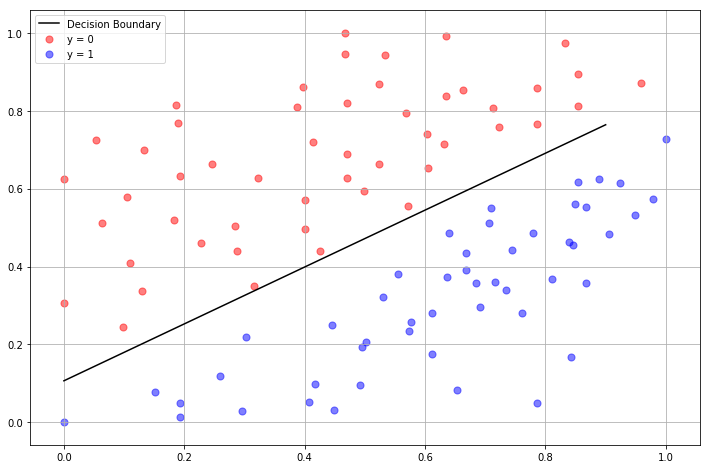

In [107]:


def main(): 
    # Import data
    X, Y = readin_csv_data('Logistic_dataset_1.csv')
    X = normalization(X,2)
    # Splitting dataset into train and test set 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.6, shuffle=True)
    # Model Learning
    model = LogisticRegression(learning_rate = 0.02, iterations = 1000) 
    model.fit(X_train, Y_train) 
    # Model Working
    M, D = X_test.shape
    TEST = np.ones((M, D+1)) 
    TEST[:,:-1] = X_test
    Y_pred = model.predict(TEST)  
    #Statistics
    print( 'Accuracy: ', metric_accuracy(Y_test, Y_pred), '%' ) 
    # Visualization
    plt.figure(figsize = (12, 8))
    X0 = X[np.where(Y == 0)] 
    X1 = X[np.where(Y == 1)] 
    p1=plt.scatter(X0[:, 0], X0[:, 1], c = 'r', alpha = .5, s = 50, label = 'y = 0')
    p2=plt.scatter(X1[:, 0], X1[:, 1], c = 'b', alpha = .5, s = 50, label = 'y = 1')
    x1 = np.arange(0, 1, 0.1) 
    x2 = -(model.W[2] + model.W[0]*x1)/model.W[1]
    p3 = plt.plot(x1, x2, c='k', label = 'Decision Boundary') 
    plt.grid(True)
    plt.legend() 
    plt.show()

    
if __name__ == '__main__':  
    main()